Text(0, 0.5, 'Aeródromo (1º ao 10º)')

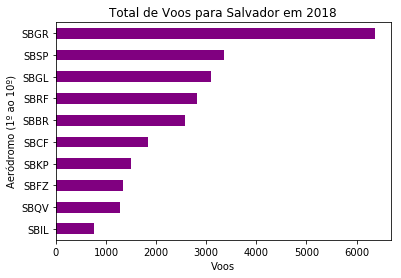

In [3]:
# Questão 1
# Arquivos auxiliares:
    # csv: Todas as planilhas de 2018 (colocar todas numa só pasta: ./data/anac/2018/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import glob

# Importação das planilhas
all_csv = glob.glob(r'./data/anac/2018/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)

# Filtragem dos dados
df = df[['ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Situação Voo', 'Partida Real']]
df = df[(df['ICAO Aeródromo Destino'] == 'SBSV') & (df['Situação Voo'] == 'REALIZADO')]

# Dados de apoio para o gráfico
qtd_voo = df.groupby('ICAO Aeródromo Origem').size().sort_values(ascending=False)[0:10]

# Gráfico
plot = qtd_voo.sort_values(ascending=True).plot(kind='barh', color='purple', title='Total de Voos para Salvador em 2018')
plot.set_xlabel('Voos')
plot.set_ylabel('Aeródromo (1º ao 10º)')

# Lista de "Aeródromo com mais voos para SBSV x Mês/2018"
#df_ssa['Mês Partida Real'] = pd.DatetimeIndex(pd.to_datetime(df_ssa['Partida Real'], format='%d/%m/%Y %H:%M')).month
#for x in range(1,13):
#    print(df_ssa[df_ssa['Mês Partida Real'] == x].pivot_table(index=['Mês Partida Real', 'ICAO Aeródromo Origem'], values=['Situação Voo'], aggfunc='count').sort_values(by=['Mês Partida Real', 'Situação Voo'], ascending=[True, False])[:1])

**1- Em 2018, qual foi o destino com a maior quantidade de voos chegando a Salvador? E por mês, há diferença?**

Com o total de 6364 voos realizados para Salvador (SBSV) em 2018, o aeródromo que mais contabilizou destino foi SBGR (Guarulhos). Tal estatística justifica-se pelo fato de ser o aeroporto com o maior número de embarque e desembarque do país em 2018, totalizando 41.134.816, que representa 19,53% da participação nacional.¹

A partir da filtragem por voos realizados e o aeródromo de destino (no caso, SBSV/Salvador), é possível determinar, através da contagem de voos com a coluna de aeródromo de origem (groupby), qual foi o que mais teve destino a Salvador, conforme disposto no gráfico.

Assim como no total geral, SBGR foi o aeródromo com mais voos em cada mês do ano, tendo uma média de 530 voos por mês.

¹ https://www.anac.gov.br/assuntos/dados-e-estatisticas/mercado-de-transporte-aereo/consulta-interativa/demanda-e-oferta-ranking-de-aeroportos

Text(0, 0.5, 'Quantidade de Atrasos')

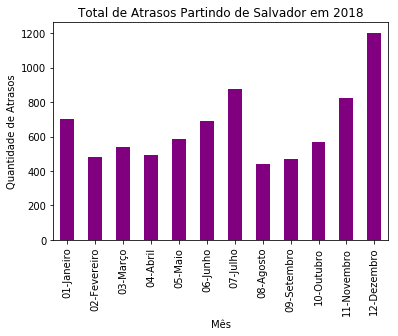

In [4]:
# Questão 2
# Arquivos auxiliares:
    # csv: Todas as planilhas de 2018 (colocar todas numa só pasta: ./data/anac/2018/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import glob
import numpy as np

# Importação das planilhas
all_csv = glob.glob(r'./data/anac/2018/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)

# Definir se houve atraso na partida do voo
df['Delta_T'] = pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Partida Prevista'], format='%d/%m/%Y %H:%M')
df['Atraso'] = np.where(df['Delta_T'] > '00:00:00', 'SIM', 'NAO')

# Filtragem dos dados
df = df[(df['Situação Voo'] == 'REALIZADO') & (df['ICAO Aeródromo Origem'] == 'SBSV') & (df['Atraso'] == 'SIM')]

# Definir somente o mês de cada voo
df['Mês Partida Real'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).month

df['Mês Partida Real'] = df['Mês Partida Real'].map({1:'01-Janeiro',
                                                     2:'02-Fevereiro',
                                                     3:'03-Março',
                                                     4:'04-Abril',
                                                     5:'05-Maio',
                                                     6:'06-Junho',
                                                     7:'07-Julho',
                                                     8:'08-Agosto',
                                                     9:'09-Setembro',
                                                     10:'10-Outubro',
                                                     11:'11-Novembro',
                                                     12:'12-Dezembro'})

# Dados de apoio para o gráfico
qtd_voo = df.groupby('Mês Partida Real').size()

# Gráfico
plot = qtd_voo.plot(kind='bar', color='purple', title='Total de Atrasos Partindo de Salvador em 2018')
plot.set_xlabel('Mês')
plot.set_ylabel('Quantidade de Atrasos')

**2- Ainda em 2018, qual foi o mês que houve a maior quantidade de atrasos de voos saindo do aeroporto de Salvador?**

Dezembro foi o mês que houve mais atrasos saindo de Salvador, contabilizando 1203 voos.

Para chegar a este resultado, primeiramente, é preciso descobrir a diferença de tempo entre a Partida Real x Partida Prevista, ou seja, saber se o horário de saída real do voo foi maior que o horário previsto, caso seja, classifica-se como um atraso. Em seguida, selecionar somente os voos realizados saindo de Salvador com atraso na partida.

Por fim, é definido o mês de cada voo (para uso no gráfico) e calculada a quantidade de atrasos mês-a-mês (groupby).

Text(0, 0.5, 'Ocorrências de Voo')

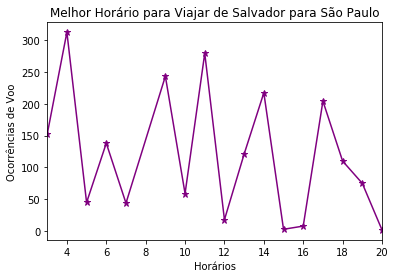

In [31]:
# Questão 3
# Arquivos auxiliares:
    # csv: Todas as planilhas de 2018 (colocar todas numa só pasta: ./data/anac/2018/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import numpy as np
import glob

# Importação das planilhas
all_csv = glob.glob(r'./data/anac/2018/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)

# Definir os voos com atrasos na partida e/ou chegada
df['Atraso Partida'] = np.where(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Partida Prevista'], format='%d/%m/%Y %H:%M') > '00:00:00', 'SIM', 'NAO')
df['Atraso Chegada'] = np.where(pd.to_datetime(df['Chegada Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M') > '00:00:00', 'SIM', 'NAO')

# Filtragem dos dados
df = df[(df['Situação Voo'] == 'REALIZADO') & (df['ICAO Aeródromo Origem'] == 'SBSV') & (df['ICAO Aeródromo Destino'] == 'SBSP') & (df['Atraso Partida'] == 'NAO') & (df['Atraso Chegada'] == 'NAO')]

# Definir a hora de partida de cada voo
df['Hora Partida'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).hour

# Dados de apoio para o gráfico
horario = df.groupby('Hora Partida').size()

# Gráfico
plot = horario.plot(kind='line', marker='*', markersize='7', color='purple', title='Melhor Horário para Viajar de Salvador para São Paulo')
plot.set_xlabel('Horários')
plot.set_ylabel('Ocorrências de Voo')

**3- Na sua opinião, qual o melhor horário para ir de Salvador à São Paulo? Por que?**

Para chegar a esta conclusão, foram selecionados voos que não tiveram atrasos nem na partida e nem na chegada, ou seja, voos que saíram no horário previsto, chegaram no horário previsto ou que conseguiram se antecipar nas respectivas ocasiões; caso contrário, indícios de atrasos apontam falha no serviço, e esses voos devem ser descartados da análise. Por fim, é efetuada a filtragem para voos realizados somente de Salvador a São Paulo.

Agora que temos os voos com os melhores níveis de serviço, é possível identificar o melhor provável horário para ir de Salvador a São Paulo. Foi constatado que o horário com o maior número de ocorrências dentro das condições já descritas consta no intervalo das 4h, com 312 ocorrências, conforme o gráfico.

Resumindo, é preciso, primeiramente, analisar se os horários de partida e chegada foram cumpridos, e depois qual é o horário com o maior número de ocorrências com base no nível de serviço definido.

Text(0, 0.5, 'Quantidade de Voos')

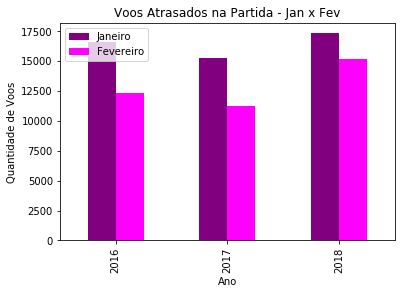

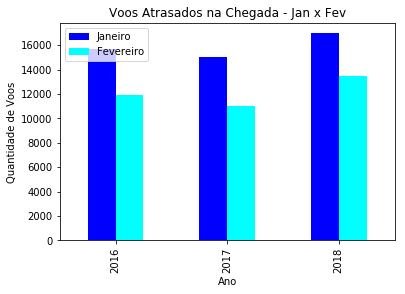

In [27]:
# Questão 4
# Arquivos auxiliares:
    # csv: Planilhas de Janeiro e Fevereiro de 2016, 2017 e 2018 (colocar todas numa só pasta: ./data/anac/outros/)
    # Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plot

# Importação das planilhas
all_csv = glob.glob(r'./data/anac/outros/*.csv')

li = []

for csv in all_csv:
    df_temp = pd.read_csv(csv, encoding='ISO-8859-1', sep=';')
    li.append(df_temp)

df = pd.concat(li, sort=False)

# Definir quais voos tiveram atraso na chegada
df['Atraso Chegada'] = np.where(pd.to_datetime(df['Chegada Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M') > '00:00:00', 'SIM', 'NAO')
df['Atraso Partida'] = np.where(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M') - pd.to_datetime(df['Partida Prevista'], format='%d/%m/%Y %H:%M') > '00:00:00', 'SIM', 'NAO')

# Definir ano e mês de cada voo
df['Ano'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).year
df['Mês'] = pd.DatetimeIndex(pd.to_datetime(df['Partida Real'], format='%d/%m/%Y %H:%M')).month

# Filtragem e preparação dos dados
df = df[(df['Situação Voo'] == 'REALIZADO') & (df['Ano'] > 2015) & (df['Mês'] >= 1) & (df['Mês'] <= 2)]
df['Ano'] = df['Ano'].astype(int)

## Atraso na Partida
# Dados de apoio para o gráfico de partida
qtd_partida = df.loc[df['Atraso Partida'] == 'SIM'].groupby(['Ano','Mês']).size().unstack()

# Gráfico de partida
plot_partida = qtd_partida.plot(kind='bar', color=['purple', 'magenta'], title='Voos Atrasados na Partida - Jan x Fev')
plot_partida.legend(['Janeiro', 'Fevereiro'], loc='upper left')
plot_partida.set_xlabel('Ano')
plot_partida.set_ylabel('Quantidade de Voos')

## Atraso na Chegada
# Dados de apoio para o gráfico de chegada
qtd_chegada = df.loc[df['Atraso Chegada'] == 'SIM'].groupby(['Ano','Mês']).size().unstack()

# Gráfico de chegada
plot_chegada = qtd_chegada.plot(kind='bar', color=['blue', 'cyan'], title='Voos Atrasados na Chegada - Jan x Fev')
plot_chegada.legend(['Janeiro', 'Fevereiro'], loc='upper left')
plot_chegada.set_xlabel('Ano')
plot_chegada.set_ylabel('Quantidade de Voos')

**4. Os dados de Fevereiro ainda não foram disponibilizados. Baseados nos dados de anos anteriores, devo esperar um aumento ou diminuição no número de atrasos em relação a Janeiro deste ano.**

A fim de ter uma visão atualizada, evitando que circunstâncias (políticas, sociais, etc.) defasadas interfiram na assertividade da análise, os dados utilizados foram restringidos ao período de 3 anos (2016 a 2018).

O primeiro passo foi unificar todos os dados de 2016 a 2018; em seguida, definir quais voos tiveram atraso na partida e/ou chegada, e mês/ano de cada voo; por fim, efetuar a filtragem dos voos realizados nos meses de Janeiro e Fevereiro nesses 3 anos.

Para 2019, espera-se um redução nos atrasos em Fevereiro comparado a Janeiro, pois nos dois gráficos é possível notar uma redução nos atrasos nos 3 anos anteriores:

Atrasos na Partida: **2016**: -4285 atrasos (-25,80%) | **2017**: -3981 atrasos (-26,12%) | **2018**: -2171 atrasos (-12,52%);

Atrasos na Chegada: **2016**: -3762 atrasos (-23,95%) | **2017**: -3989 atrasos (-26,58%) | **2018**: -3459 atrasos (-20,38%);

Com uma média de -3479 (-21,48%) nos atrasos de partida e -3737 (-23,64%) nos atrasos de chegada de Janeiro para Fevereiro de 2016 a 2018, o fato de Janeiro ser um mês de férias/recesso, ou seja, muitas pessoas viajando, justifica a sobrecarga nos aeroportos do país e consequentemente o aumento dos atrasos.

In [62]:
# Análise de dados sobre dados da ANAC.
# Fonte: http://www.anac.gov.br/assuntos/dados-e-estatisticas/historico-de-voos

# $ sudo apt-get update
# $ sudo apt-get install -y python3-pip build-essential libssl-dev libffi-dev python-dev python3-venv jupyter-notebook
# $ mkdir ~/app/data/anac/2018/
# $ mkdir ~/app/data/anac/outros/
# $ cd ~/app/
# $ virtualenv -p python3 env
# $ source /env/bin/activate
# $ pip3 install jupyter matplotlib numpy
# $ jupyter notebook